### ------Import the libraries------

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout , Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

### ------Explore the data------

In [103]:
data = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [104]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [106]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [108]:
data.shape

(4857377, 8)

In [109]:
data.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

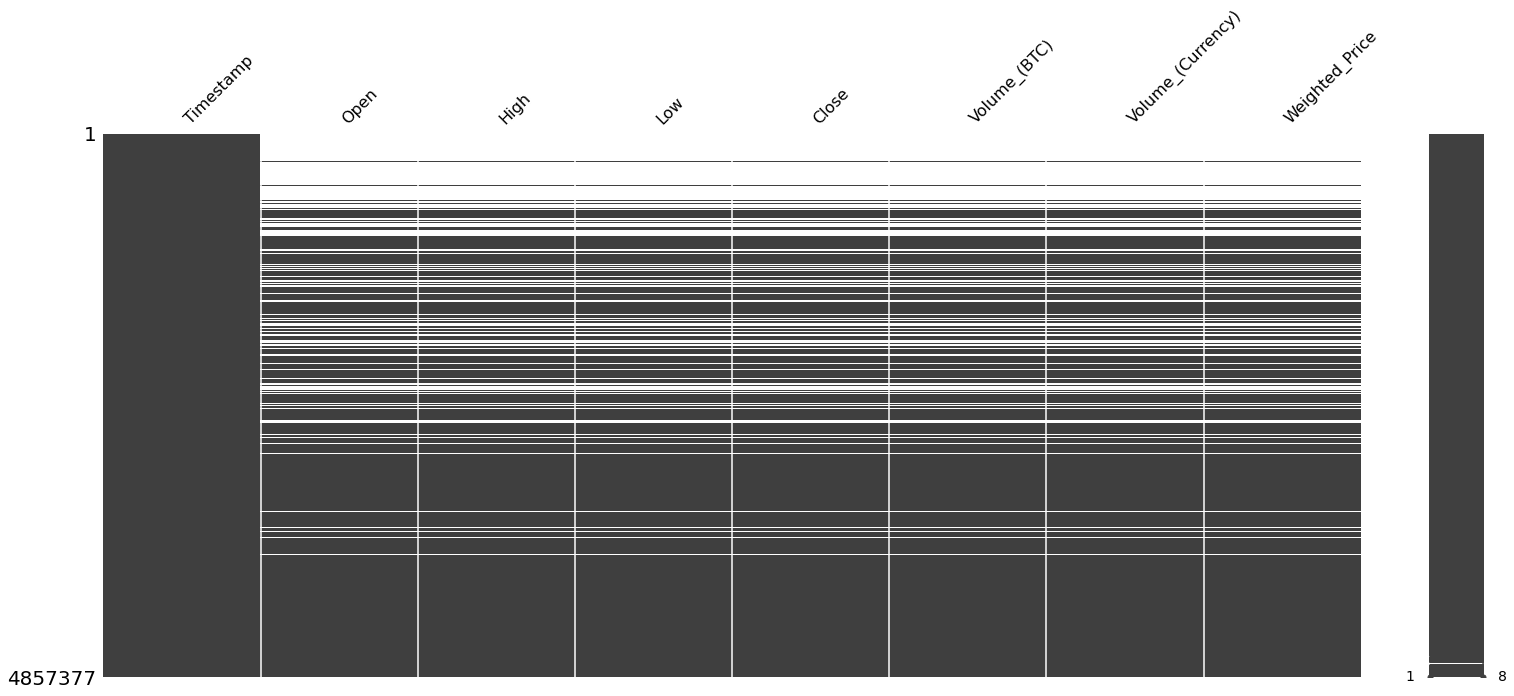

In [110]:
msno.matrix(data)
plt.show()

In [111]:
data = data.dropna().reset_index(drop=True)

In [112]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [113]:
data.Timestamp = pd.to_datetime(data.Timestamp , unit = 's')

In [114]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [115]:
data['date']= data.Timestamp.dt.date

In [116]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01


In [117]:
data_per_day = data.groupby(data.date).mean()

In [118]:
data_per_day

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
date,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819


In [119]:
data_per_day.shape

(3376, 7)

In [120]:
data_per_day.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3376.0,4605.644798,8207.258774,4.331667,244.954735,697.954849,7242.739376,60458.339735
High,3376.0,4608.916329,8213.768034,4.331667,245.046306,698.221190,7248.233526,60488.868334
Low,3376.0,4602.220278,8200.562238,4.331667,244.869102,697.654114,7238.040275,60426.441554
Close,3376.0,4605.640430,8207.368264,4.331667,244.959590,697.921509,7242.417035,60458.888892
Volume_(BTC),3376.0,10.355675,8.897358,0.250000,4.671673,7.622244,13.114867,119.522868
Volume_(Currency),3376.0,31790.810259,62753.976425,1.227500,1916.186042,6832.004108,36074.508308,950995.602917
Weighted_Price,3376.0,4605.576442,8207.031620,4.331667,244.952580,697.948484,7242.892623,60455.844831


### ---------Visualisations--------

In [121]:
features = np.array(data_per_day.columns)

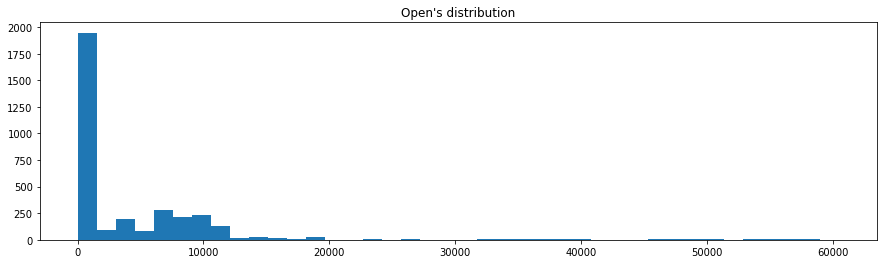

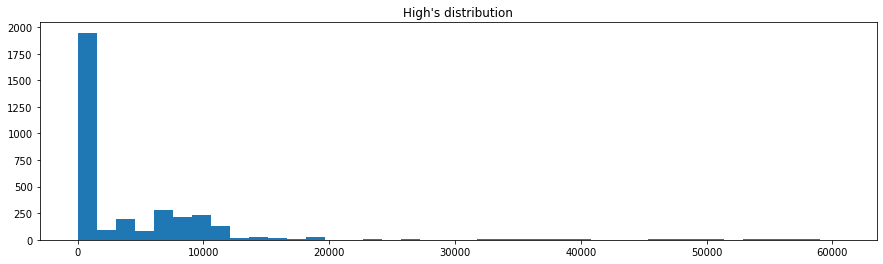

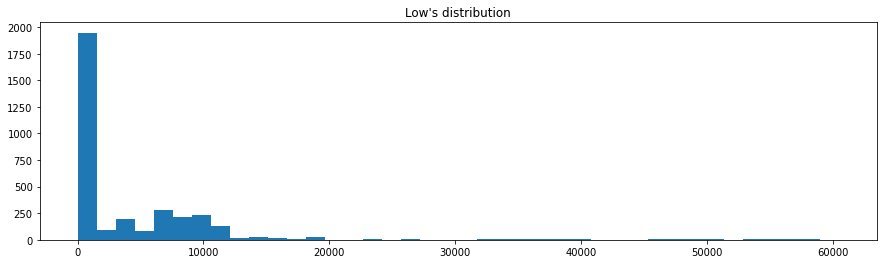

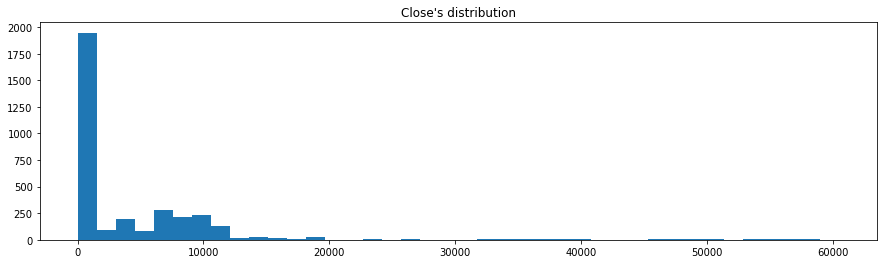

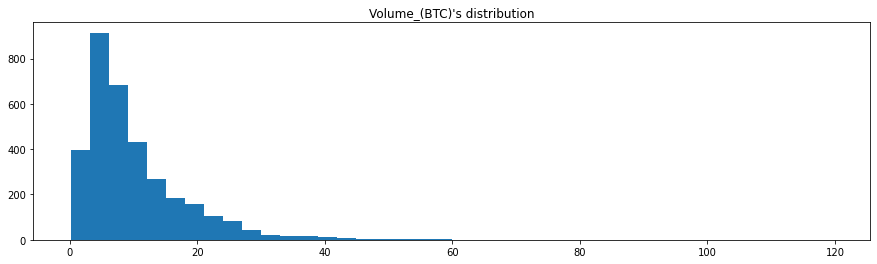

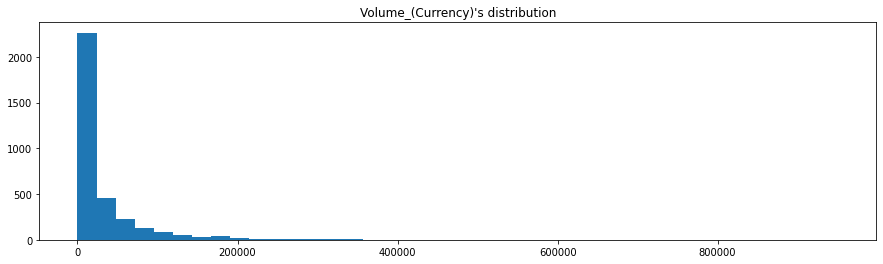

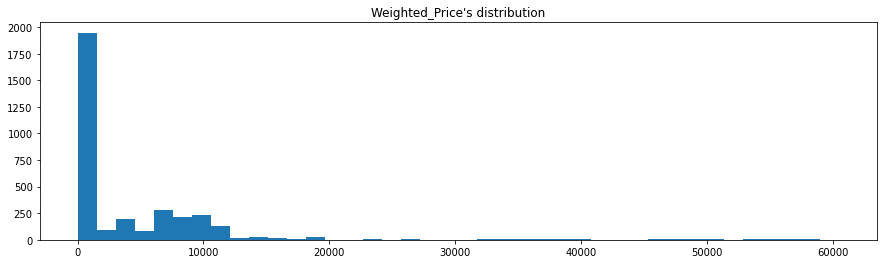

In [122]:
for f in features :
    plt.figure(figsize=(15,4))
    plt.hist( data_per_day[f],bins = 40) ; 
    plt.title("{}\'s distribution".format(f))
    

<Figure size 2160x2160 with 0 Axes>

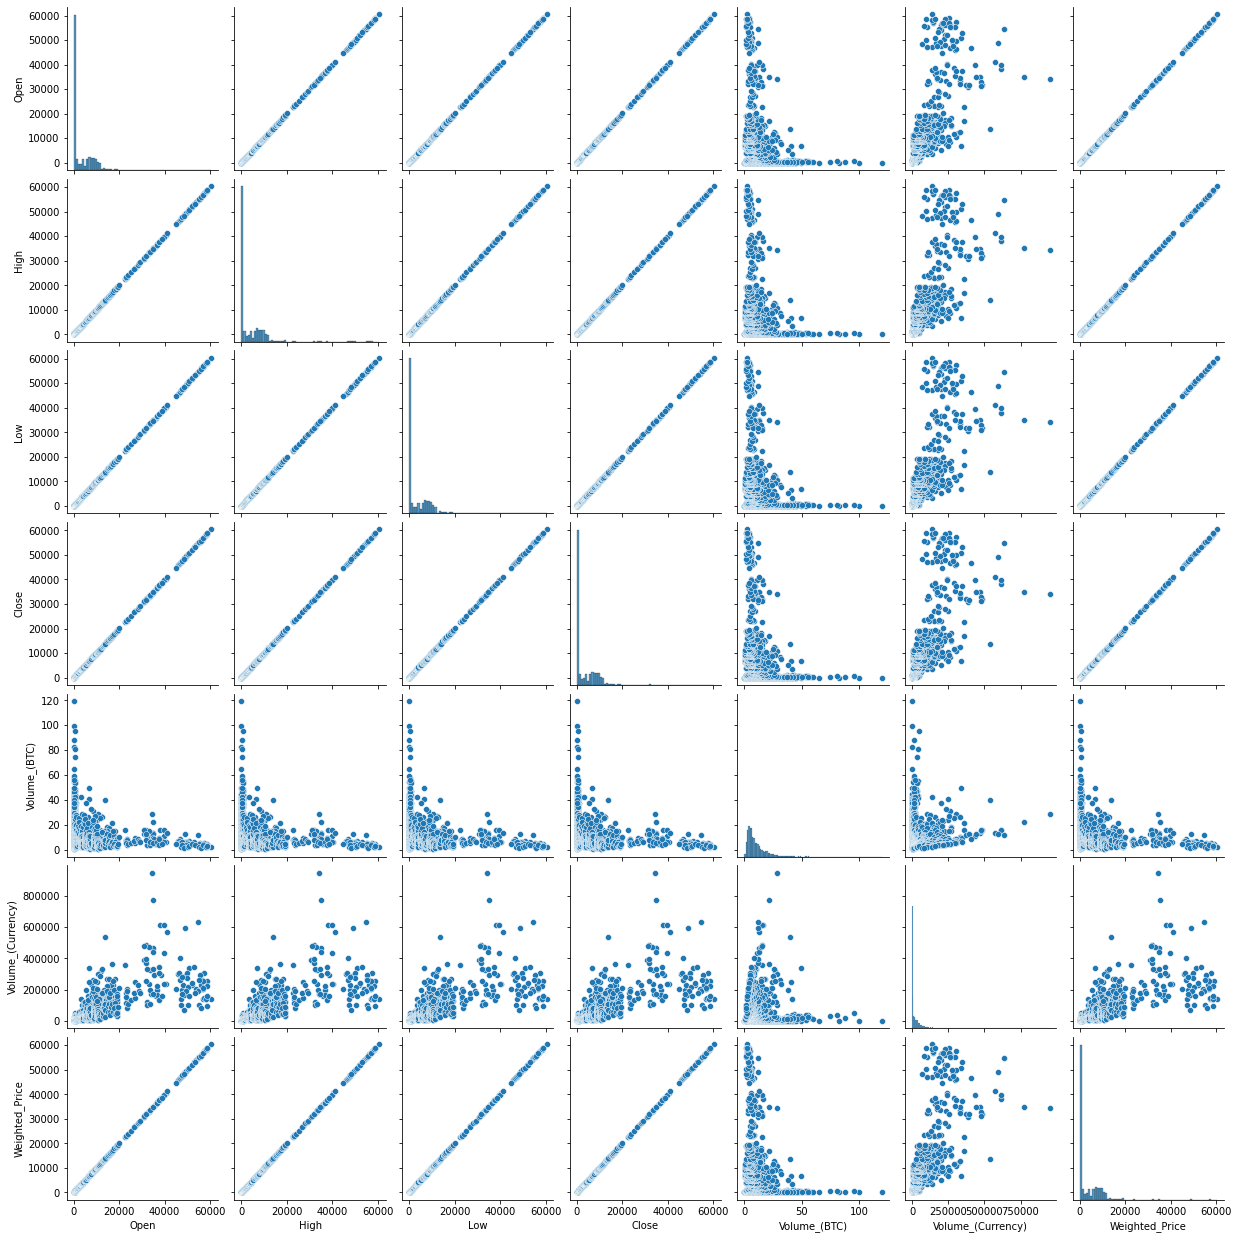

In [123]:
plt.figure(figsize = (30,30))
sns.pairplot(data_per_day)

<AxesSubplot:>

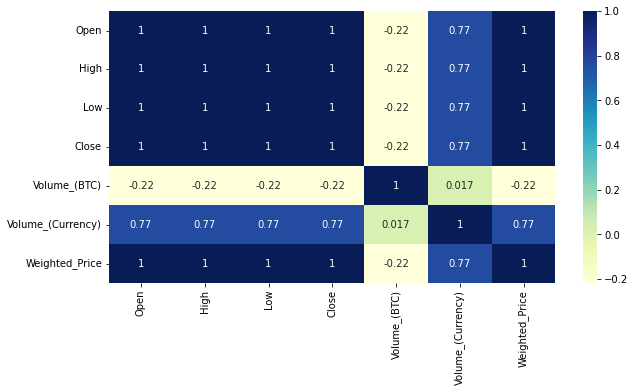

In [124]:
plt.figure(figsize = (10,5))
sns.heatmap(data_per_day.corr(), annot = True ,cmap = 'YlGnBu')

In [125]:
data  = data_per_day.Open

In [126]:
data

date
2011-12-31        4.465000
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.200000
                  ...     
2021-03-27    55193.240643
2021-03-28    55833.608471
2021-03-29    56914.886595
2021-03-30    58347.805624
2021-03-31    58767.750000
Name: Open, Length: 3376, dtype: float64

Text(0.5, 1.0, 'The Open price evolution')

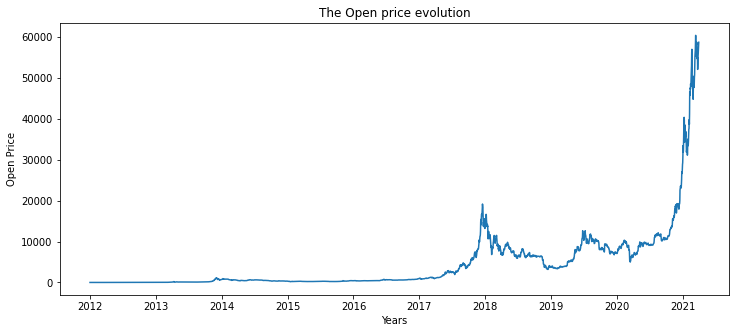

In [127]:
plt.figure(figsize=(12, 5))
plt.plot( data) 
plt.xlabel("Years")            
plt.ylabel("Open Price")            
plt.title("The Open price evolution")          

### --------Build The model--------

In [128]:
data = data.values

In [129]:
max = np.max(data)

In [130]:
data = data/max

In [132]:
X = [data[i:i+10] for i in range(len(data)-11)]
Y = [data[i+10] for i in range(len(data)-11)]

In [133]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.25 , shuffle= False)

In [134]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [135]:
X_train.shape

(2523, 10)

In [136]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [137]:
X_train.shape

(2523, 1, 10)

In [144]:
np.random.seed(0)
model = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(1, 10)),
    Dropout(0.15) , 
    Dense(1) 
])
model.compile(loss='mse' , optimizer= 'adam')


In [145]:
history = model.fit( X_train , Y_train , epochs = 20)

Epoch 1/20
79/79 [==============================] - 3s 3ms/step - loss: 7.2888e-04
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 6.7669e-05
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 5.8454e-05
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 5.6498e-05
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 5.7468e-05
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 5.7385e-05
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 5.8190e-05
Epoch 8/20
79/79 [==============================] - 0s 3ms/step - loss: 5.5228e-05
Epoch 9/20
79/79 [==============================] - 0s 3ms/step - loss: 5.2202e-05
Epoch 10/20
79/79 [==============================] - 0s 3ms/step - loss: 5.0213e-05
Epoch 11/20
79/79 [==============================] - 0s 3ms/step - loss: 4.8195e-05
Epoch 12/20
79/79 [==============================] - 0s 3ms/step - loss: 5.0516e-05
E

In [164]:
pred_train = model.predict(X_train)

In [165]:
print(mean_absolute_error(Y_train, pred_train))
print(np.sqrt(mean_squared_error(Y_train, pred_train)))
print(r2_score(Y_train, pred_train))

0.002604155364522045
0.004705447581190222
0.9919753894066238


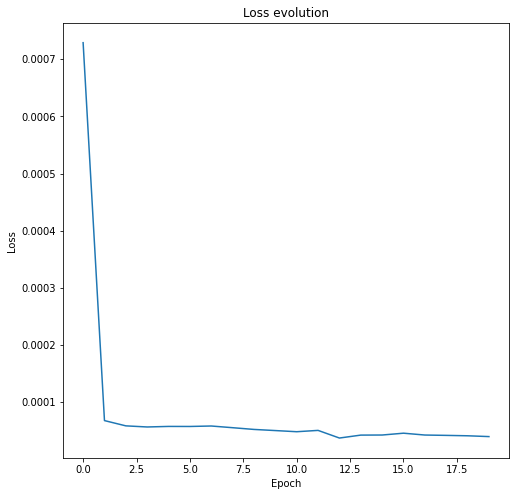

In [157]:
plt.figure(figsize=(8,8));
plt.title("Loss evolution");
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.plot(history.history['loss']);

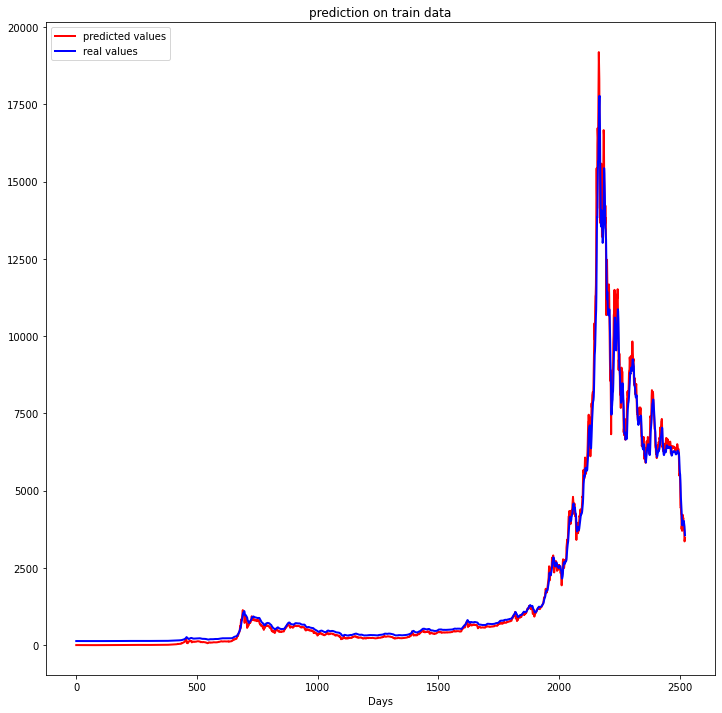

In [168]:
preds1 = pred_train* max
plt.figure( figsize=( 12 , 12 ) );
plt.plot(Y_train * max , c='red' , label='predicted values' , linewidth=2);
plt.plot( preds1  , c='blue' , label='real values' , linewidth=2);
plt.xlabel("Days");
plt.title("prediction on train data")
plt.legend();

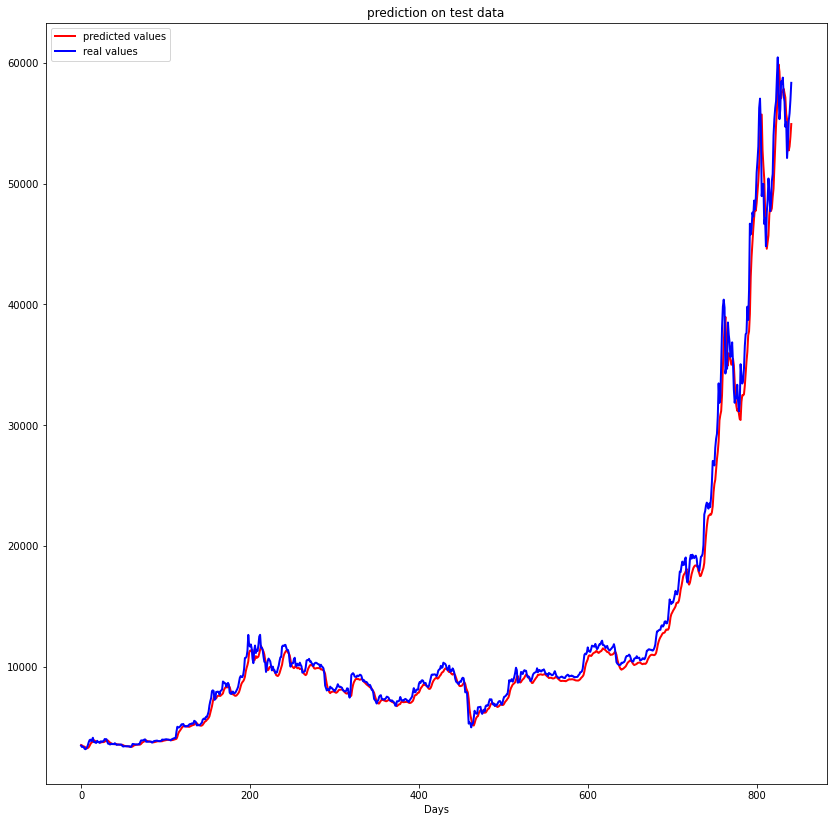

In [160]:
preds = model.predict(X_test) * max
plt.figure( figsize=( 14 , 14 ) );
plt.plot(preds , c='red' , label='predicted values' , linewidth=2);
plt.plot(  Y_test * max , c='blue' , label='real values' , linewidth=2);
plt.xlabel("Days");
plt.title("prediction on test data");
plt.legend();